In [76]:
import cmath
import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random

# Opgave 1 *

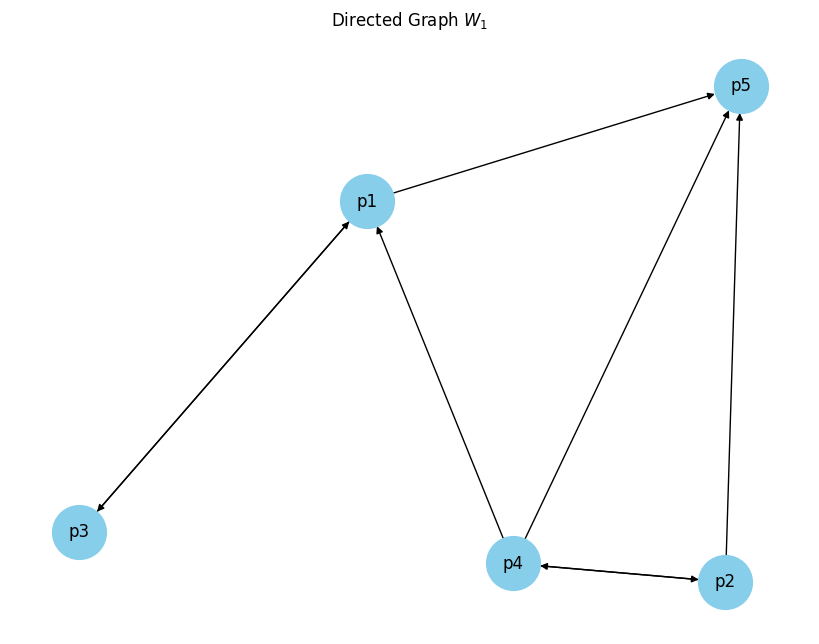

In [77]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 2 *

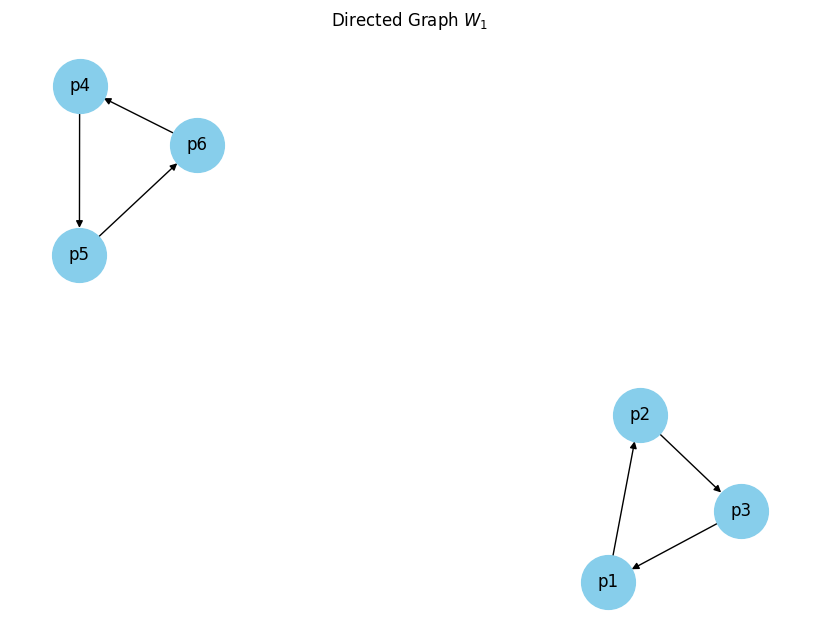

In [78]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 3 & 4 *

In [79]:


# Definition af netværket
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}

W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

def makeAdjacencyMatrix(W):
    nodes = list(W.keys())
    length = len(nodes)  
    
    output = np.zeros((length, length), dtype=int)
    
    node_index = {node: idx for idx, node in enumerate(nodes)}
    
    for i, node in enumerate(nodes):
        for neighbor in W[node]:
            j = node_index[neighbor]  
            output[i][j] = 1  
    
    return output

# Test function
print("W1")
print(makeAdjacencyMatrix(W1))
print("\nW2")
print(makeAdjacencyMatrix(W2))

W1
[[0 1 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

W2
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


# Opgave 5

In [80]:
import numpy as np

def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(100,99,50))

{0: [72, 49, 40, 61, 95, 50, 66, 88, 90, 24, 48, 44, 37, 43, 19, 87, 46, 67, 94, 36, 63, 62, 28, 81, 20, 53, 79, 55, 86, 1, 6, 15, 91, 4, 27, 92, 56, 51, 10, 84, 65, 47, 31, 9, 29, 97, 8, 35, 68, 85, 39, 58, 74, 16, 70, 25, 18, 96, 99, 83, 2, 30, 52, 98, 17, 82, 80], 1: [47, 48, 77, 26, 86, 30, 52, 16, 10, 83, 72, 67, 65, 93, 58, 91, 68, 5, 13, 57, 97, 98, 4, 44, 22, 75, 49, 36, 37, 11, 96, 24, 55, 66, 29, 50, 64, 87, 27, 56, 3, 2, 80, 19, 94, 45, 43, 14, 73, 9, 21, 38, 31, 8, 20, 0, 46], 2: [24, 17, 86, 72, 83, 31, 29, 50, 52, 30, 56, 91, 35, 58, 45, 75, 16, 13, 49, 14, 92, 70, 47, 11, 61, 89, 23, 37, 82, 41, 71, 88, 33, 36, 8, 7, 80, 40, 76, 39, 43, 81, 4, 28, 96, 74, 25, 94, 46, 42, 44, 5, 90, 98, 27, 54, 55, 21, 68, 69, 78, 85, 15, 38, 34, 84, 95, 18, 12, 62, 51, 93, 79, 26, 6, 73, 10, 59, 87, 1, 64, 3, 57, 97, 65, 20, 53, 9, 66, 99, 67, 48, 77, 19, 22, 63, 60], 3: [13, 73, 5, 59, 41, 36, 83, 12, 86, 22, 45, 76, 27, 93, 1, 67, 98, 95, 18, 79, 4, 66, 57, 43, 88, 44, 48, 74, 6, 69, 2

# Opgave 6 *

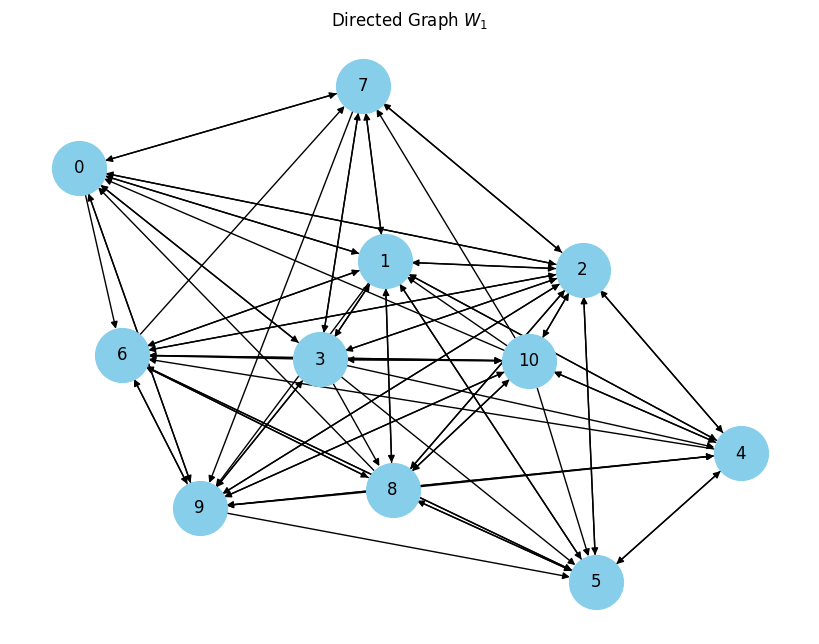

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(web):
    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf

    G = nx.DiGraph()

    for node, neighbors in web.items():
        for target in neighbors:
            G.add_edge(node, target)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
    plt.title("Directed Graph $W_1$")
    plt.show()

visualize_graph(make_web(11,10,5))